# Исследование надежности заемщиков


## Откроем таблицу и изучим общую информацию о данных

 **Задание 1. Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd


try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
    

**Задание 2. Выведем первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(40)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце  обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

**Задание 8. Выведем перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверем остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используем собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используем собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут нам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

   Количество детей  Количество кредитов  Доля должников  Количество должников
0                 0              14107.0        0.075353                1063.0
1                 1               4809.0        0.092327                 444.0
2                 2               2052.0        0.094542                 194.0
3                 3                330.0        0.081818                  27.0
4                 4                 41.0        0.097561                   4.0
5                 5                  9.0        0.000000                   0.0


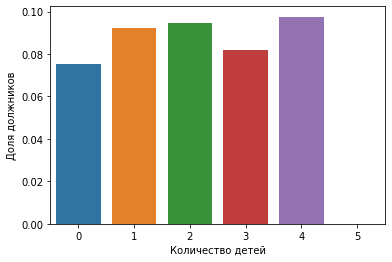

In [22]:

    
   


data_child=data.pivot_table(index=['children'],values='debt',aggfunc={'debt':['count','sum','mean']}).reset_index()
data_child.columns=['Количество детей','Количество кредитов','Доля должников','Количество должников']
print(data_child)
import seaborn
seaborn.barplot(x=data_child['Количество детей'],y=data_child['Доля должников']);








Если рассмотреть зависимость между количеством детей у заемщиков и возвратом кредита в срок, можно заметить следующие особенности:

* Всего лишь у девяти заемщиков пятеро детей. У них ни разу не было проблем с возвратом кредита в срок
* Больше всего кредитов берут люди, не имеющие детей. И доля должников среди них невелика
* Довольно велика доля должников среди семей с четыремя детьми, но количество таких заемщиков невелико, всего лишь 41 человек
* Наибольшие доли должников среди семей с двумя и тремя детьми, что видно из графика

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

                  Статус  Количество кредитов  Доля должников  \
0  Не женат / не замужем               2796.0        0.097639   
1              в разводе               1189.0        0.070648   
2         вдовец / вдова                951.0        0.066246   
3       гражданский брак               4146.0        0.092861   
4        женат / замужем              12266.0        0.075575   

   Количество должников  
0                 273.0  
1                  84.0  
2                  63.0  
3                 385.0  
4                 927.0  


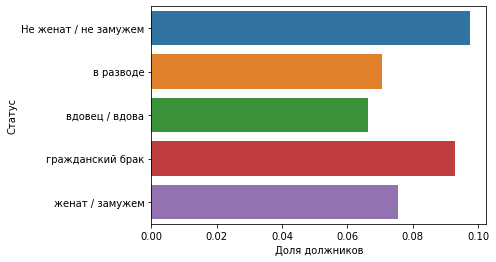

In [23]:

data_family=data.pivot_table(index=['family_status'],values='debt',aggfunc={'debt':['count','sum','mean']}).reset_index()
data_family.columns=['Статус','Количество кредитов','Доля должников','Количество должников']
print(data_family)
seaborn.barplot(x=data_family['Доля должников'],y=data_family['Статус']);











**Вывод:** 
Если рассматривать зависимость между семейным положением и способностью вернуть кредит в срок, можно отметить:

* Больше всего кредитов берут женатые/замужные люди, и их способность выплатить займ в срок высока
* Самая высокая доля должников по кредитам - среди тех, кто не женат/не замужем
* Также высокая доля должников среди людей, предпочитающих гражданский брак, но их доля от общего числа заемщиков не так высока


**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

  Категории уровня дохода  Количество кредитов  Доля должников  \
0                       A                 25.0        0.080000   
1                       B               5014.0        0.070602   
2                       C              15938.0        0.084891   
3                       D                349.0        0.060172   
4                       E                 22.0        0.090909   

   Количество должников  
0                   2.0  
1                 354.0  
2                1353.0  
3                  21.0  
4                   2.0  


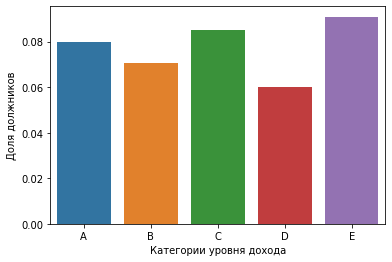

In [24]:
data_zp=data.pivot_table(index=['total_income_category'],values='debt',aggfunc={'debt':['count','sum','mean']}).reset_index()
data_zp.columns=['Категории уровня дохода','Количество кредитов','Доля должников','Количество должников']
print(data_zp)
seaborn.barplot(x=data_zp['Категории уровня дохода'],y=data_zp['Доля должников']);


**Вывод:** 
Судя по графику, обнаруживаем следующее:

* Наиболее часто не выплачивают кредиты в срок люди с низкой зарплатой из категории Е. Но их доля от общего 
числа заемщиков очень мала
* Наиболее рискованной группой можно считать группу доходов С: люди из этой категории часто берут кредит и имеют много задолжностей по кредитам
* Люди с высоким доходом редко берут кредиты
* Люди с хорошим доходом из категории В тоже довольно часто берут кредиты, доля должников среди них невелика, их можно считать надежными заемщиками

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

                  Категория  Количество кредитов  Доля должников  \
0    операции с автомобилем               4281.0        0.093436   
1  операции с недвижимостью              10754.0        0.072531   
2     получение образования               3989.0        0.092504   
3        проведение свадьбы               2324.0        0.078744   

   Количество должников  
0                 400.0  
1                 780.0  
2                 369.0  
3                 183.0  


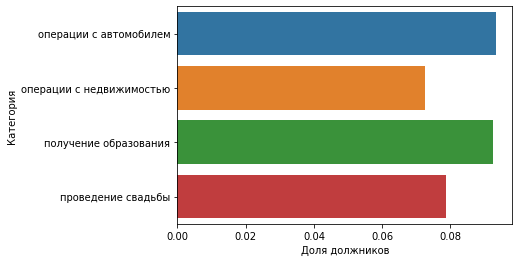

In [25]:
data_celi=data.pivot_table(index=['purpose_category'],values='debt',aggfunc={'debt':['count','sum','mean']}).reset_index()
data_celi.columns=['Категория','Количество кредитов','Доля должников','Количество должников']
seaborn.barplot(x=data_celi['Доля должников'],y=data_celi['Категория'])
print(data_celi) 







**Вывод:** 
Если обратить внимание на цели кредита, наблюдаем такую картину:

* Наиболее благополучной категорией заемщиков являются люди, которые берут кредит на недвижимость: таких заемщиков
много среди общего числа клиентов банка, а отдают кредит они обычно в срок
* Также много людей берут кредиты на автомобили, но ситуация здесь иная: доля людей, имеющих задолжность, велика
* Что касается кредитов на  получение образования и проведение свадеб, тут число заемщиков примерно одинаково, но на образование
приходится бОльшая доля должников


**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

Нахождение **`пропусков`** в исходных данных - очень важная задача в процессе предобработки данных. 

Причины их появления бывают разными:

* **Человеческий фактор** - если данные в таблицы вносят люди вручную, вероятность случайной ошибки довольно велика
* **Отказ пользователей** - например, если пользователи не желают оставлять о себе какую-то информацию, к примеру, указыввать номер телефона или электронную почту
* Бывает такие ситуации: например, человек не работает. Тогда в графе 'трудовой стаж' или 'должность' у него может возникнуть пропуск


**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

Предобработка пропусков является важной частью работы аналитика.
Пропуски присутствуют как в категориальных переменных, так и в количественных.

В количественных переменных пропуски можно заменять на так называемые `характерные значения`
Чтобы оценить эти значения применяют два метода:

* **среднее арифметическое значение**
* **медиана**

Если выборка данных более или менее равномерна и не имеет серьезных всплесков, скачков, - то можно применять и метод среднего значения.

Однако, если в выборке есть скачки показателей, то значения среднего арифметического и медианы могут серьезно разниться:

In [26]:
age=pd.Series([1,2,3,4,5,100,300,500,700,1000])
print('Среднее значение равно:',age.mean())
print('Медиана равна:',age.median())

Среднее значение равно: 261.5
Медиана равна: 52.5


Вследствие такой разницы результаты исследования могут быть некорректными. 
Именно поэтому рекомендуется для заполнения пропусков в количественных переменных использовать медианные значения 

## Общий вывод.

Исследовав данные, предоставленные кредитным отделом банка, предварительно проведя предобработку данных, можно
отметить следующие тенденции:

* Наиболее часто берут кредиты семейные люди, при этом их доля среди общего числа должников невелика
* При этом не женатые/замужные люди имеют проблемы с возвратом кредита в срок
* Многодетны семьи редко берут кредиты и никогда не имеют проблем с их возвратом
* Семьи, в которых пока нет детей, наоборот, часто берут кредиты, при этом являясь добросовестными заемщиками
* Самой рискованной группой в плане возврата долга в срок являются семьи с одним и двумя детьми